In [1]:
# وارد کردن کتابخانه های مورد نیاز
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# تنظیمات برای نمایش بهتر در نوت بوک
%matplotlib inline
sns.set_style('darkgrid')

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# مسیر فایل داده را مشخص می کنیم
# چون نوت بوک ما در پوشه notebooks قرار دارد، باید یک مرحله به عقب برگردیم (..) تا به پوشه data برسیم
file_path = '../data/gt_2011.csv'

# خواندن داده ها با پانداز
df = pd.read_csv(file_path)

print("Dataset loaded successfully!")

Dataset loaded successfully!


In [3]:
df.head()


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      1499 non-null   float64
 1   AP      1499 non-null   float64
 2   AH      1499 non-null   float64
 3   AFDP    1499 non-null   float64
 4   GTEP    1499 non-null   float64
 5   TIT     1499 non-null   float64
 6   TAT     1499 non-null   float64
 7   TEY     1499 non-null   float64
 8   CDP     1499 non-null   float64
 9   CO      1499 non-null   float64
 10  NOX     1499 non-null   float64
dtypes: float64(11)
memory usage: 128.9 KB


In [5]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000
mean,8.788604,1016.970340,83.899360,4.453922,27.605985,1091.223149,540.606965,145.949673,12.786064,1.009654,73.353447
std,3.179929,5.705182,8.926133,0.617130,4.394596,7.808935,10.654201,14.100383,1.097854,0.728932,8.426389
min,2.116300,997.410000,51.462000,3.282900,18.778000,1047.500000,516.370000,110.860000,10.268000,0.000388,54.546000
25%,6.362850,1013.300000,79.364500,3.935700,23.696000,1084.700000,529.500000,133.670000,11.814000,0.521095,66.352500
50%,8.360900,1016.700000,85.099000,4.221700,24.292000,1086.600000,549.690000,134.780000,11.981000,0.877110,73.038000
75%,10.970500,1021.100000,90.435500,5.021250,32.451500,1100.000000,550.020000,160.895000,13.981500,1.278950,80.966000
max,19.937000,1029.700000,100.150000,5.920200,35.968000,1100.600000,550.410000,170.000000,14.851000,7.278100,102.300000


In [6]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

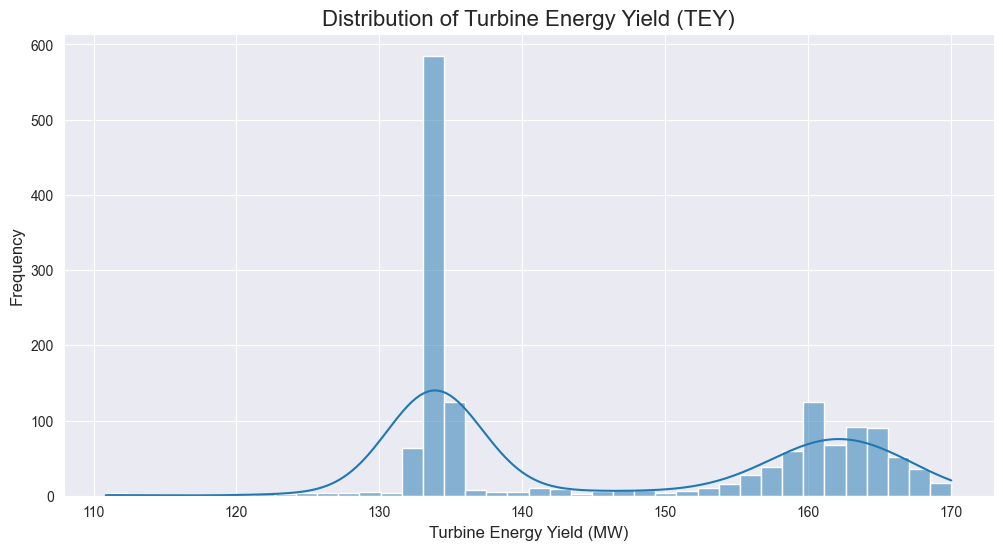

In [7]:
# رسم هیستوگرام برای متغیر هدف
plt.figure(figsize=(12, 6))
sns.histplot(df['TEY'], kde=True, bins=40) # kde=True یک خط تخمین چگالی روی نمودار اضافه می‌کند

plt.title('Distribution of Turbine Energy Yield (TEY)', fontsize=16)
plt.xlabel('Turbine Energy Yield (MW)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

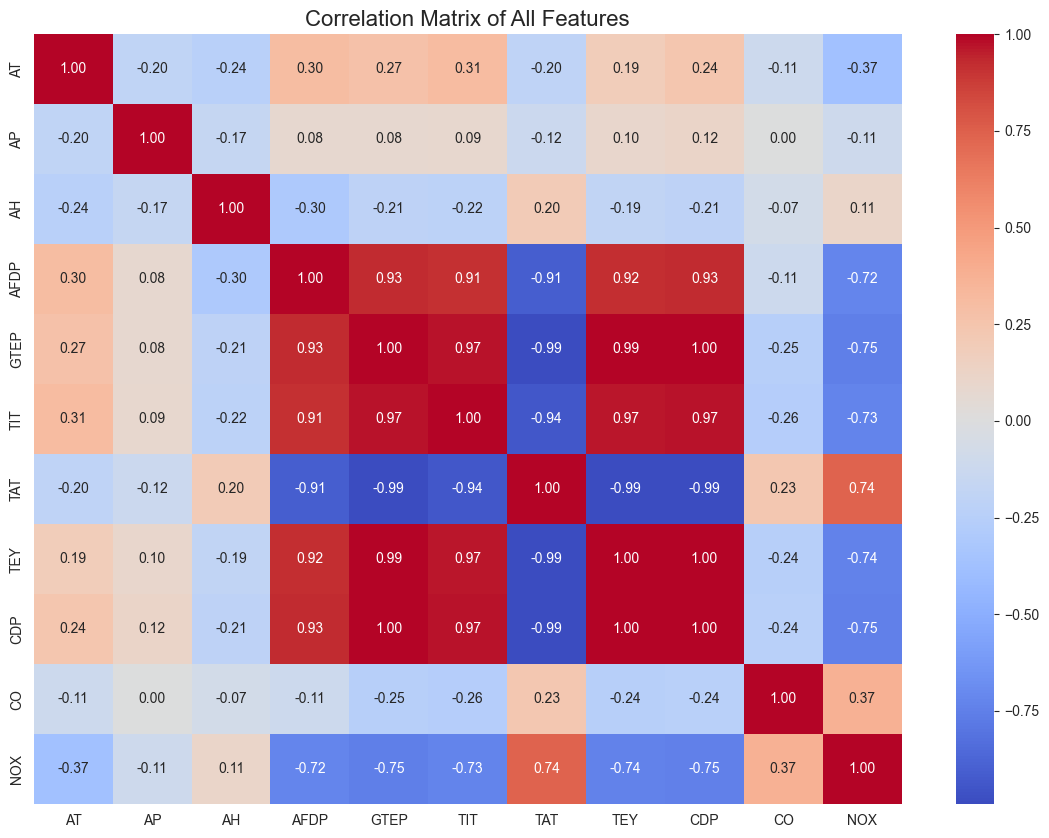

In [8]:
# محاسبه ماتریس همبستگی
correlation_matrix = df.corr()

# رسم نقشه حرارتی
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Features', fontsize=16)
plt.show()

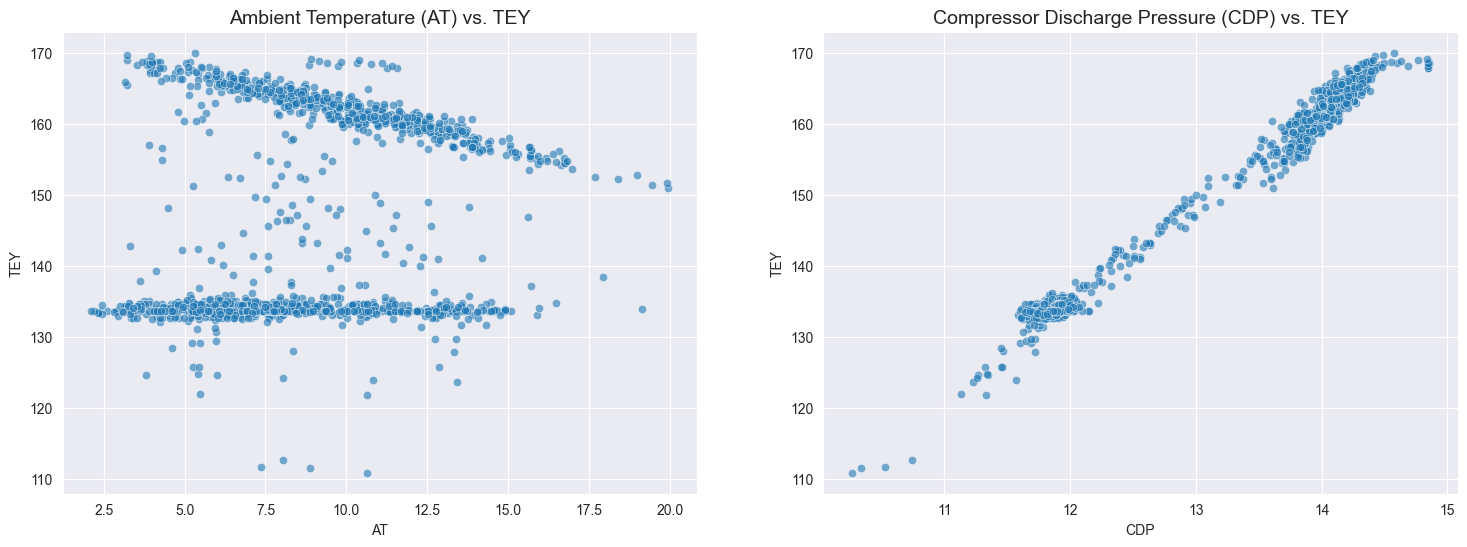

In [9]:
# ایجاد دو نمودار در کنار هم
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# نمودار ۱: رابطه دمای محیط با توان خروجی
sns.scatterplot(x='AT', y='TEY', data=df, ax=axes[0], alpha=0.6)
axes[0].set_title('Ambient Temperature (AT) vs. TEY', fontsize=14)

# نمودار ۲: رابطه فشار خروجی کمپرسور با توان خروجی
sns.scatterplot(x='CDP', y='TEY', data=df, ax=axes[1], alpha=0.6)
axes[1].set_title('Compressor Discharge Pressure (CDP) vs. TEY', fontsize=14)

plt.show()

In [10]:
# وارد کردن ابزار مورد نیاز از کتابخانه Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ----------------- 1. جداسازی ویژگی‌ها و هدف -----------------

# تمام ستون‌ها به جز TEY به عنوان ویژگی‌های ورودی (X) در نظر گرفته می‌شوند
features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX']
target = 'TEY'

X = df[features]
y = df[target]

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)


# ----------------- 2. تقسیم داده‌ها به مجموعه آموزش و آزمون -----------------

# 80% داده‌ها برای آموزش مدل و 20% برای تست آن کنار گذاشته می‌شود
# random_state=42 باعث می‌شود که این تقسیم‌بندی همیشه به یک شکل انجام شود تا نتایج قابل تکرار باشند
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData split successfully!")
print("Training set size:", X_train.shape[0], "samples")
print("Test set size:", X_test.shape[0], "samples")

Shape of features (X): (1499, 10)
Shape of target (y): (1499,)

Data split successfully!
Training set size: 1199 samples
Test set size: 300 samples


In [11]:
# ----------------- 1. ساخت و آموزش مدل -----------------

# یک نمونه از مدل رگرسیون خطی می‌سازیم
lin_reg_model = LinearRegression()

# مدل را با داده‌های آموزشی "آموزش" می‌دهیم (فرایند یادگیری)
lin_reg_model.fit(X_train, y_train)

print("Linear Regression model trained successfully!")


# ----------------- 2. پیش‌بینی روی داده‌های آزمون -----------------

# از مدل آموزش‌دیده می‌خواهیم تا خروجی را برای داده‌های آزمون (که تا به حال ندیده) پیش‌بینی کند
y_pred_lr = lin_reg_model.predict(X_test)


# ----------------- 3. ارزیابی عملکرد مدل -----------------

# دو معیار مهم را برای سنجش عملکرد مدل محاسبه می‌کنیم
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse) # ریشه میانگین مربعات خطا - قابل تفسیرتر است
r2 = r2_score(y_test, y_pred_lr)

print("\n--- Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f} MW")
print(f"R-squared (R²) Score: {r2:.4f}")
print("------------------------")

Linear Regression model trained successfully!

--- Model Evaluation ---
Mean Squared Error (MSE): 0.6357
Root Mean Squared Error (RMSE): 0.7973 MW
R-squared (R²) Score: 0.9969
------------------------


In [12]:
# وارد کردن مدل جنگل تصادفی
from sklearn.ensemble import RandomForestRegressor

# ----------------- 1. ساخت و آموزش مدل -----------------

# یک نمونه از مدل جنگل تصادفی می‌سازیم
# n_estimators=100 یعنی مدل ما از 100 درخت تصمیم تشکیل شده است
# random_state=42 برای اطمینان از تکرارپذیری نتایج
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# مدل را با همان داده‌های آموزشی قبلی، آموزش می‌دهیم
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully!")


# ----------------- 2. پیش‌بینی روی داده‌های آزمون -----------------

# پیش‌بینی با مدل جنگل تصادفی
y_pred_rf = rf_model.predict(X_test)


# ----------------- 3. ارزیابی عملکرد مدل -----------------

# محاسبه معیارها برای مدل جدید
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n--- Random Forest Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f} MW")
print(f"R-squared (R²) Score: {r2_rf:.4f}")
print("------------------------------------")

Random Forest model trained successfully!

--- Random Forest Model Evaluation ---
Mean Squared Error (MSE): 0.4111
Root Mean Squared Error (RMSE): 0.6412 MW
R-squared (R²) Score: 0.9980
------------------------------------


In [13]:
pip install xgboost

  Using cached xgboost-3.0.5-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.5-py3-none-win_amd64.whl (56.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [13]:
# وارد کردن مدل XGBoost
import xgboost as xgb

# ----------------- 1. ساخت و آموزش مدل -----------------

# یک نمونه از مدل XGBoost Regressor می‌سازیم
# objective='reg:squarederror' به مدل می‌گوید که задача ما رگرسیون است
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# مدل را با داده‌های آموزشی، آموزش می‌دهیم
xgb_model.fit(X_train, y_train)

print("XGBoost model trained successfully!")


# ----------------- 2. پیش‌بینی روی داده‌های آزمون -----------------

# پیش‌بینی با مدل XGBoost
y_pred_xgb = xgb_model.predict(X_test)


# ----------------- 3. ارزیابی عملکرد مدل -----------------

# محاسبه معیارها برای مدل XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\n--- XGBoost Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse_xgb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.4f} MW")
print(f"R-squared (R²) Score: {r2_xgb:.4f}")
print("------------------------------")

XGBoost model trained successfully!

--- XGBoost Model Evaluation ---
Mean Squared Error (MSE): 0.4036
Root Mean Squared Error (RMSE): 0.6353 MW
R-squared (R²) Score: 0.9980
------------------------------
